In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


def loading_housing_data():
    return pd.read_csv("Melbourne_housing_extra_data.csv")

housing_data=loading_housing_data()
housing_data.shape



(14246, 19)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 19 columns):
Suburb          14242 non-null object
Address         14232 non-null object
Rooms           14222 non-null float64
Type            14222 non-null object
Price           11069 non-null float64
Method          14222 non-null object
SellerG         14222 non-null object
Date            14222 non-null object
Distance        14222 non-null float64
Postcode        14222 non-null float64
Bedroom2        11202 non-null float64
Bathroom        11202 non-null float64
Car             11202 non-null float64
Landsize        11185 non-null float64
BuildingArea    6168 non-null float64
YearBuilt       7099 non-null float64
CouncilArea     11183 non-null object
Lattitude       11306 non-null object
Longtitude      11307 non-null object
dtypes: float64(10), object(9)
memory usage: 2.1+ MB


In [6]:
housing_data['Type'].isnull().sum()

24

In [7]:
housing_data['Suburb'].isnull().sum()

4

In [8]:
#housing_data[housing['Method'].isnull()]

housing_data[housing_data['Method'].isnull()].sum()

Rooms           0.0
Price           0.0
Distance        0.0
Postcode        0.0
Bedroom2        0.0
Bathroom        0.0
Car             0.0
Landsize        0.0
BuildingArea    0.0
YearBuilt       0.0
dtype: float64

In [9]:
housing = housing_data.dropna(subset=["Method", "Type", "Suburb"])
housing.shape

(14222, 19)

In [10]:
housing['Suburb'].isnull().sum()

0

In [11]:
housing['Suburb'] = housing['Suburb'].astype(str)
housing['Type'] = housing['Type'].astype(str)
housing['Method'] = housing['Method'].astype(str)

C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [12]:
housing[housing['Method'].isnull()].sum()

Suburb          0.0
Address         0.0
Rooms           0.0
Type            0.0
Price           0.0
Method          0.0
SellerG         0.0
Date            0.0
Distance        0.0
Postcode        0.0
Bedroom2        0.0
Bathroom        0.0
Car             0.0
Landsize        0.0
BuildingArea    0.0
YearBuilt       0.0
CouncilArea     0.0
Lattitude       0.0
Longtitude      0.0
dtype: float64

In [13]:
#housing["Lattitude"] = housing.Lattitude.convert_objects(convert_numeric=True)
#housing["Longtitude"] = housing.Longtitude.convert_objects(convert_numeric=True)

In [14]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944


In [15]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,14222.000000,1.106900e+04,14222.000000,14222.000000,11202.000000,11202.000000,11202.000000,11185.000000,6168.000000,7099.000000
mean,2.893967,1.076961e+06,8.621635,3098.212066,2.840564,1.530887,1.537850,469.181404,146.861539,1960.194534
std,0.985804,6.598991e+05,3.559325,59.575864,1.013490,0.717342,0.959796,1175.477306,135.265201,38.119790
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,141.000000,90.000000,1930.000000
50%,3.000000,9.000000e+05,8.800000,3085.000000,3.000000,1.000000,1.000000,351.000000,125.000000,1961.000000
75%,3.000000,1.330500e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,626.000000,176.000000,1998.000000
max,12.000000,8.000000e+06,15.000000,3207.000000,30.000000,12.000000,26.000000,75100.000000,6791.000000,2106.000000


In [16]:
#housing["Suburb"].value_counts()

In [17]:
housing["Method"].value_counts()

S     8406
SP    2013
PI    1883
VB    1098
SN     587
PN     121
SA      51
W       51
SS      12
Name: Method, dtype: int64

In [18]:
#housing["SellerG"].value_counts()

In [19]:
#checking the price outliers
import seaborn as sns
sns.boxplot(x=housing['Price'])

In [20]:
outliers_price = housing


In [21]:
housing['Price'].isnull().sum()

3153

In [22]:
housin_price_withoutnull = housing.dropna(subset=["Price"])

housin_price_withoutnull.shape

(11069, 19)

In [23]:
housin_price_withoutnull['log_Price']=np.log(housin_price_withoutnull['Price']).copy()

C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


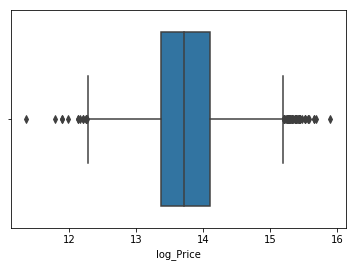

In [24]:
sns.boxplot(x=housin_price_withoutnull['log_Price'])

In [25]:
q75, q25 = np.percentile(housin_price_withoutnull.log_Price.dropna(), [60 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [26]:
housin_price_withoutnull['Outlier'] = 0
 
housin_price_withoutnull.loc[housin_price_withoutnull['log_Price'] < min, 'Outlier'] = 1
housin_price_withoutnull.loc[housin_price_withoutnull['log_Price'] > max, 'Outlier'] = 1

C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akanksha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
housin_price_withoutnull['Outlier'].loc[housin_price_withoutnull['Outlier']==1].count()

906

In [28]:
housin_price_withoutnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11069 entries, 1 to 14240
Data columns (total 21 columns):
Suburb          11069 non-null object
Address         11069 non-null object
Rooms           11069 non-null float64
Type            11069 non-null object
Price           11069 non-null float64
Method          11069 non-null object
SellerG         11069 non-null object
Date            11069 non-null object
Distance        11069 non-null float64
Postcode        11069 non-null float64
Bedroom2        8741 non-null float64
Bathroom        8741 non-null float64
Car             8741 non-null float64
Landsize        8730 non-null float64
BuildingArea    4746 non-null float64
YearBuilt       5474 non-null float64
CouncilArea     8729 non-null object
Lattitude       8827 non-null object
Longtitude      8808 non-null object
log_Price       11069 non-null float64
Outlier         11069 non-null int64
dtypes: float64(11), int64(1), object(9)
memory usage: 1.9+ MB


In [29]:
#housin_price_withoutnull=housin_price_withoutnull.drop(housin_price_withoutnull[housin_price_withoutnull.log_Price == 1].index)


housin_price_withoutnull=housin_price_withoutnull[housin_price_withoutnull.Outlier != 1]

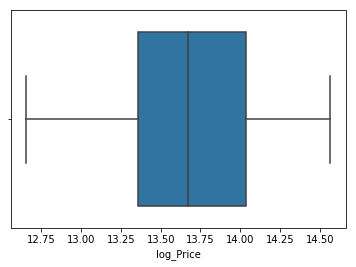

In [30]:
sns.boxplot(x=housin_price_withoutnull['log_Price'])

In [31]:
#housin_price_withoutnull = housin_price_withoutnull[housin_price_withoutnull["score"] > 50]

In [32]:
housin_price_withoutnull['Outlier'].loc[housin_price_withoutnull['Outlier']==1].count()

0

In [33]:
housin_price_withoutnull.corr().Price.sort_values(ascending=False)

Price           1.000000
log_Price       0.972409
Rooms           0.532493
Bedroom2        0.501732
Bathroom        0.387486
BuildingArea    0.272532
Postcode        0.256533
Car             0.223061
Landsize        0.049747
Distance       -0.037278
YearBuilt      -0.373300
Outlier              NaN
Name: Price, dtype: float64

In [34]:
housing["CouncilArea"].value_counts()

Boroondara       1351
Moreland         1140
Stonnington       953
Moonee Valley     919
Darebin           903
Glen Eira         836
Port Phillip      693
Maribyrnong       685
Yarra             677
Banyule           546
Bayside           506
Melbourne         458
Hobsons Bay       404
Brimbank          301
Manningham        255
Whitehorse        237
Monash            216
Kingston           82
Hume               21
Name: CouncilArea, dtype: int64

In [35]:
housin_price_withoutnull.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,log_Price,Outlier
count,10163.000000,1.016300e+04,10163.000000,10163.000000,8012.000000,8012.000000,8012.000000,8001.000000,4305.000000,4970.000000,10163.000000,10163.0
mean,2.790613,9.601675e+05,8.807498,3092.252189,2.742137,1.432476,1.487394,453.573303,133.126490,1962.963380,13.678660,0.0
std,0.894693,4.212067e+05,3.629044,59.820112,0.909681,0.619501,0.903655,1308.080035,137.940728,36.601033,0.443500,0.0
min,1.000000,3.130000e+05,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,12.653958,0.0
25%,2.000000,6.320000e+05,5.900000,3042.000000,2.000000,1.000000,1.000000,130.000000,86.000000,1940.000000,13.356645,0.0
50%,3.000000,8.680000e+05,9.100000,3073.000000,3.000000,1.000000,1.000000,322.000000,117.000000,1968.000000,13.673947,0.0
75%,3.000000,1.245000e+06,11.700000,3145.000000,3.000000,2.000000,2.000000,604.000000,157.000000,1998.750000,14.034646,0.0
max,10.000000,2.117000e+06,15.000000,3207.000000,20.000000,8.000000,8.000000,75100.000000,6791.000000,2018.000000,14.565511,0.0


In [36]:
housing["Type"].value_counts()

h    9080
u    3568
t    1574
Name: Type, dtype: int64

In [37]:
housing.corr().Price.sort_values(ascending=False)

Price           1.000000
Rooms           0.556374
Bedroom2        0.532209
Bathroom        0.515975
BuildingArea    0.361064
Car             0.287505
Postcode        0.273237
Landsize        0.071443
Distance       -0.073167
YearBuilt      -0.319787
Name: Price, dtype: float64

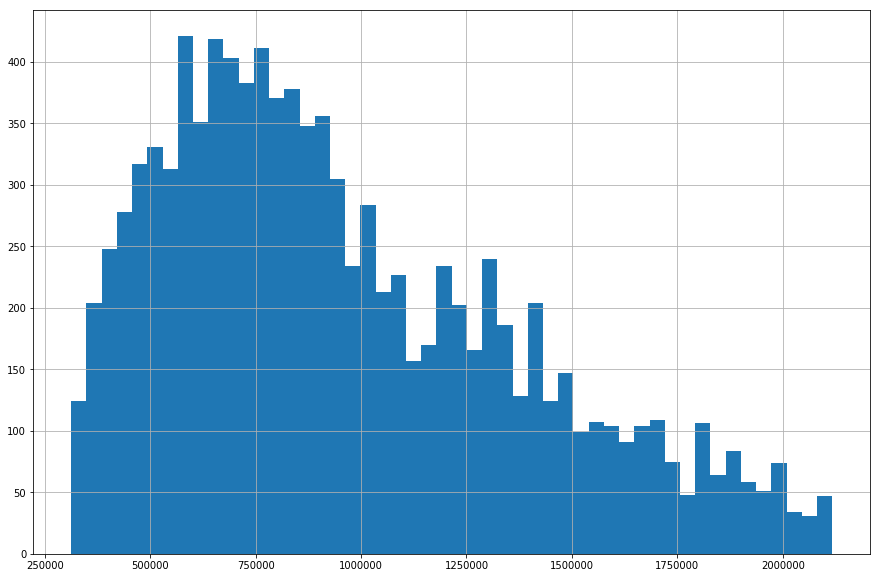

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
housin_price_withoutnull['Price'].hist(bins=50, figsize=(15,10))
plt.show()

In [39]:
housing["Rooms_per_YearBuilt"] = housing["Rooms"]/housing["YearBuilt"]
#housing["room_per_buildingArea1"] = housing["BuildingArea"]/housing["Rooms"]
#housing["bedroom_per_buildingArea1"] = housing["BuildingArea"]/housing["Bedroom2"]
housing["Distnce_per_household"]=housing["BuildingArea"]/housing["Distance"]
#housing["Rooms_per_Landsize1"]=housing["Landsize"]/housing["Rooms"]

housing["RoomsSum"] = housing["Rooms"] + housing["Bedroom2"] + housing["Bathroom"] + housing["Car"]
#housing["GardenArea"] = housing["Landsize"] - housing["BuildingArea"]
#housing['RoomPerGardenArea1'] = housing["BuildingArea"]/housing["RoomsSum"]

C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [40]:
'''housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=1,
    s=housing["Rooms"]/100, label="Rooms", figsize=(10,7),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()'''

'housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=1,\n    s=housing["Rooms"]/100, label="Rooms", figsize=(10,7),\n    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,\n    sharex=False)\nplt.legend()'

In [41]:
#housing = housing.drop('YearBuilt',axis=1)
#housing = housing.drop('Distance',axis=1)
#housing = housing.drop('Landsize',axis=1)

In [42]:
housing.corr().Price.sort_values(ascending=False)

Price                    1.000000
Rooms_per_YearBuilt      0.614529
RoomsSum                 0.582268
Rooms                    0.556374
Bedroom2                 0.532209
Bathroom                 0.515975
BuildingArea             0.361064
Distnce_per_household    0.342046
Car                      0.287505
Postcode                 0.273237
Landsize                 0.071443
Distance                -0.073167
YearBuilt               -0.319787
Name: Price, dtype: float64

In [43]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,NaN,NaN,6.0
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,NaN,NaN,6.0
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,0.001053,31.6,5.0
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,NaN,NaN,9.0
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,0.001579,60.0,8.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019CC91CB160>,
      dtype=object)

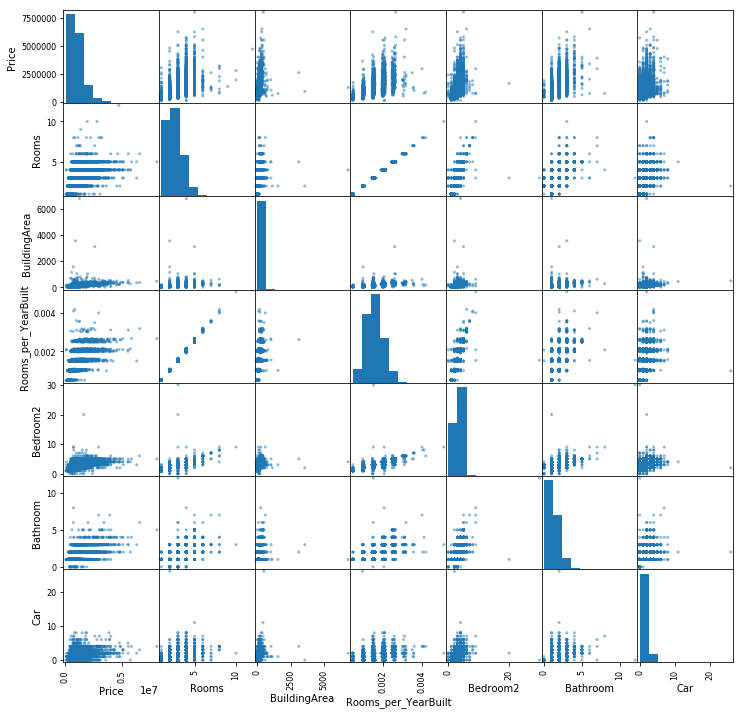

In [44]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "BuildingArea", "Rooms_per_YearBuilt", "Bedroom2", "Bathroom",
              "Car"]
scatter_matrix(housing[attributes], figsize=(12, 12))

In [45]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set_impu = train_set.drop("Suburb", axis=1)
train_set_impu = train_set_impu.drop("Address", axis=1) #drop
train_set_impu = train_set_impu.drop("Method", axis=1)
train_set_impu = train_set_impu.drop("SellerG", axis=1)
train_set_impu = train_set_impu.drop("CouncilArea", axis=1)
train_set_impu = train_set_impu.drop("Type", axis=1)
train_set_impu = train_set_impu.drop("Date", axis=1)
train_set_impu = train_set_impu.drop("Lattitude", axis=1)
train_set_impu = train_set_impu.drop("Longtitude", axis=1)
train_set_impu = train_set_impu.drop("YearBuilt", axis=1)
train_set_impu = train_set_impu.drop("Postcode", axis=1)
train_set_num = train_set_impu.copy()

In [46]:
housing[housing.isnull().any(axis=1)].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,NaN,NaN,6.0
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,NaN,NaN,6.0
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,NaN,NaN,9.0
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,NaN,NaN,9.0
7,Abbotsford,16 Maugie St,4.0,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965,0.001994,88.0,11.0


In [47]:
housing.corr().Price.sort_values(ascending=False)

Price                    1.000000
Rooms_per_YearBuilt      0.614529
RoomsSum                 0.582268
Rooms                    0.556374
Bedroom2                 0.532209
Bathroom                 0.515975
BuildingArea             0.361064
Distnce_per_household    0.342046
Car                      0.287505
Postcode                 0.273237
Landsize                 0.071443
Distance                -0.073167
YearBuilt               -0.319787
Name: Price, dtype: float64

In [48]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
#housing_num = housing.drop("Price", axis=1)
imputer.fit(train_set_impu)

imputer.statistics_

array([3.00000000e+00, 8.99000000e+05, 8.80000000e+00, 3.08400000e+03,
       3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.50000000e+02,
       1.24000000e+02, 1.96500000e+03, 1.52091265e-03, 1.59782609e+01,
       9.00000000e+00])

In [49]:
train_set_impu.median().values

array([3.00000000e+00, 8.99000000e+05, 8.80000000e+00, 3.08400000e+03,
       3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 3.50000000e+02,
       1.24000000e+02, 1.96500000e+03, 1.52091265e-03, 1.59782609e+01,
       9.00000000e+00])

In [50]:
X = imputer.transform(train_set_impu)
housing_transformed_trained = pd.DataFrame(X, columns=train_set_impu.columns)
print(len(housing_transformed_trained), "housing_transformed_trained ")


11377 housing_transformed_trained 


In [51]:
num_attribs = list(train_set_num)
print(num_attribs)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Rooms_per_YearBuilt', 'Distnce_per_household', 'RoomsSum']


In [52]:
train_set_num.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
count,11377.000000,8.869000e+03,11377.000000,11377.000000,8982.000000,8982.000000,8982.000000,8968.000000,4931.000000,5678.000000,5678.000000,4931.000000,8982.000000
mean,2.888108,1.078286e+06,8.635361,3098.150303,2.831218,1.529169,1.537965,474.188894,145.206569,1960.565692,0.001474,21.142995,8.766867
std,0.978072,6.657436e+05,3.563945,59.668930,0.986160,0.713015,0.976882,1276.532358,128.375477,38.096669,0.000515,18.856597,2.964208
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000496,0.000000,2.000000
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,141.750000,90.000000,1930.000000,0.001020,10.411665,6.000000
50%,3.000000,8.990000e+05,8.800000,3084.000000,3.000000,1.000000,1.000000,350.000000,124.000000,1965.000000,0.001521,15.978261,9.000000
75%,3.000000,1.330000e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,624.000000,175.000000,1998.000000,0.001983,25.423729,10.000000
max,12.000000,8.000000e+06,15.000000,3207.000000,20.000000,8.000000,26.000000,75100.000000,6791.000000,2018.000000,0.005076,575.508475,32.000000


In [53]:
#housing_transformed_trained['Suburb'] = train_set['Suburb'].copy()
#housing_transformed_trained['Method'] = train_set['Method'].copy()
#housing_transformed_trained['Type'] = train_set['Type'].copy()
#housing_transformed_trained['CouncilArea'] = train_set['CouncilArea'].copy() //many nulls

housing_transformed_trained.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
0,2.0,1300000.0,9.3,3145.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0
1,2.0,899000.0,11.2,3127.0,2.0,1.0,1.0,464.0,117.0,1995.0,0.001003,10.446429,6.0
2,3.0,670000.0,11.1,3025.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0
3,3.0,899000.0,8.0,3040.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0
4,3.0,765000.0,7.8,3058.0,3.0,1.0,1.0,350.0,124.0,1965.0,0.001521,15.978261,9.0


In [54]:
list(train_set_num)

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Rooms_per_YearBuilt',
 'Distnce_per_household',
 'RoomsSum']

In [55]:
#housing['Suburb']

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from future_encoders import ColumnTransformer,make_column_transformer
from future_encoders import OneHotEncoder


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(train_set_num)
#num_attribs.remove('Price')
cat_attribs = ["Type"] #"Method", "Type"

num_pipeline = Pipeline([
      #  ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
#med_train_set = num_pipeline.fit_transform(housing_transformed_trained)
#print(med_train_set)

full_pipeline = ColumnTransformer([
       ('num', num_pipeline, num_attribs),
#        ('cat', OneHotEncoder(), cat_attribs),
    ])


housing_train_set_prepared = full_pipeline.fit_transform(housing_transformed_trained)

print(housing_train_set_prepared)

[[-0.90805866  0.44094444  0.18649791 ...  0.06372648 -0.17662069
   0.06984079]
 [-0.90805866 -0.23590777  0.71963836 ... -1.35801761 -0.6130917
  -1.0685241 ]
 [ 0.11440604 -0.62243934  0.69157834 ...  0.06372648 -0.17662069
   0.06984079]
 ...
 [ 0.11440604 -0.56040862  0.5232182  ... -0.01816258 -0.49802671
   0.44929576]
 [ 2.15933545  2.04445965  0.29873801 ...  2.72839367  1.45844122
   2.34657058]
 [-0.90805866 -0.23590777 -1.77770375 ... -1.22054753  3.22815945
  -1.0685241 ]]


In [57]:
from future_encoders import OneHotEncoder
encoder = OneHotEncoder()
suburb_cat_encoded,suburb_categories = train_set["Suburb"].factorize()
suburb_cat_1hot = encoder.fit_transform(suburb_cat_encoded.reshape(-1,1))

type_cat_encoded,type_categories = train_set["Type"].factorize()
type_cat_1hot = encoder.fit_transform(type_cat_encoded.reshape(-1,1))

method_cat_encoded,method_categories = train_set["Method"].factorize()
method_cat_1hot = encoder.fit_transform(method_cat_encoded.reshape(-1,1))


suburb_cat_1hot
suburb_cat_encoded.sort()
#print(suburb_categories)
suburb_cat_encoded
suburb_cat_1hot.toarray()

a = np.concatenate([X, method_cat_1hot.toarray(), type_cat_1hot.toarray()], axis=1)
col = num_attribs + method_categories.tolist() + type_categories.tolist()

housing_train_encoded = pd.DataFrame(data=a[0:,0:], columns=col[0:])

housing_train_encoded.head()
#type_cat_encoded
#col

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,VB,PI,SN,PN,W,SS,SA,h,t,u
0,2.0,1300000.0,9.3,3145.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,899000.0,11.2,3127.0,2.0,1.0,1.0,464.0,117.0,1995.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,670000.0,11.1,3025.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,899000.0,8.0,3040.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,765000.0,7.8,3058.0,3.0,1.0,1.0,350.0,124.0,1965.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
housing_transformed_trained.corr().Price.sort_values(ascending=False)

Price                    1.000000
Rooms                    0.464249
RoomsSum                 0.427391
Bedroom2                 0.391628
Rooms_per_YearBuilt      0.369623
Bathroom                 0.358532
Distnce_per_household    0.253076
BuildingArea             0.235134
Postcode                 0.230832
Car                      0.211242
Landsize                 0.054528
Distance                -0.056573
YearBuilt               -0.190932
Name: Price, dtype: float64

In [59]:
housing_transformed_trained.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_per_YearBuilt,Distnce_per_household,RoomsSum
count,11377.000000,1.137700e+04,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000,11377.000000
mean,2.888108,1.038763e+06,8.635361,3098.150303,2.866749,1.417773,1.424717,447.892766,133.191315,1962.786939,0.001498,18.216751,8.815944
std,0.978072,5.924744e+05,3.563945,59.668930,0.878921,0.669254,0.895261,1134.476255,85.161450,27.003535,0.000365,12.674554,2.635475
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000496,0.000000,2.000000
25%,2.000000,7.100000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,192.000000,124.000000,1965.000000,0.001521,15.978261,7.000000
50%,3.000000,8.990000e+05,8.800000,3084.000000,3.000000,1.000000,1.000000,350.000000,124.000000,1965.000000,0.001521,15.978261,9.000000
75%,3.000000,1.200000e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,581.000000,124.000000,1965.000000,0.001521,15.978261,10.000000
max,12.000000,8.000000e+06,15.000000,3207.000000,20.000000,8.000000,26.000000,75100.000000,6791.000000,2018.000000,0.005076,575.508475,32.000000


In [60]:
from sklearn.linear_model import LinearRegression

housing_train_X = housing_transformed_trained.drop("Price", axis=1)
housing_train_Y = housing_transformed_trained["Price"].copy()


lin_reg = LinearRegression()
lin_reg.fit(housing_train_X, housing_train_Y) #THIS GIVES THE EQUATION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:

#print("Labels:", list(housing_test_Y))

#Computing prediction on training
print("Predictions:", lin_reg.predict(housing_train_X))








Predictions: [ 841117.23483505  647529.17786605  774537.04727212 ...  906971.57502187
 1676170.01224844 1096917.52447159]


In [62]:
# Now we shall compare the train predicted Y with the train actual Y(which is is just one price column)

import numpy as np
from sklearn.metrics import mean_squared_error
Train_Y_predicted=lin_reg.predict(housing_train_X)

lin_mse = mean_squared_error(housing_train_Y, Train_Y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

479433.8531798081

In [63]:
lin_scores = cross_val_score(lin_reg, housing_train_X, housing_train_Y,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

NameError: name 'cross_val_score' is not defined

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_train_X, housing_train_Y)


In [ ]:
# Predicting value of Y

Train_Y_predicted_TREE=tree_reg.predict(housing_train_X)

tree_mse = mean_squared_error(housing_train_Y, Train_Y_predicted_TREE)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_train_X, housing_train_Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(housing_train_X, housing_train_Y)

In [ ]:
forest_scores = cross_val_score(forest_reg, housing_train_X, housing_train_Y,
                             scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
#Imputing the test data


test_set_impu = test_set.drop("Suburb", axis=1)
test_set_impu = test_set_impu.drop("Address", axis=1)
test_set_impu = test_set_impu.drop("Method", axis=1)
test_set_impu = test_set_impu.drop("SellerG", axis=1)
test_set_impu = test_set_impu.drop("CouncilArea", axis=1)
test_set_impu = test_set_impu.drop("Type", axis=1)
test_set_impu = test_set_impu.drop("Date", axis=1)
test_set_impu = test_set_impu.drop("Lattitude", axis=1)
test_set_impu = test_set_impu.drop("Longtitude", axis=1)
#test_set_impu = test_set_impu.drop("YearBuilt", axis=1)
#test_set_impu = test_set_impu.drop("Postcode", axis=1)

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
#housing_num = housing.drop("Price", axis=1)
imputer.fit(test_set_impu)

imputer.statistics_


X_test = imputer.transform(test_set_impu)
housing_transformed_test = pd.DataFrame(X, columns=test_set_impu.columns)
#print(len(housing_transformed_test), "housing_transformed_trained ")

In [ ]:
#dividing test into X and Y

housing_test_X = housing_transformed_test.drop("Price", axis=1)
housing_test_Y = housing_transformed_test["Price"].copy()


print("Predictions:", lin_reg.predict(housing_test_X))

#print("Labels:", list(housing_test_Y))

In [ ]:
# Now we shall compare the test predicted Y with the test actual Y (which is is just one price column)

import numpy as np
from sklearn.metrics import mean_squared_error
test_Y_predicted=lin_reg.predict(housing_test_X)

lin_mse = mean_squared_error(housing_test_Y, test_Y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(housing_test_Y, test_Y_predicted)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
#housing.describe()

In [ ]:
Test_Y_predicted_TREE=tree_reg.predict(housing_test_X)

tree_mse = mean_squared_error(housing_test_Y, Test_Y_predicted_TREE)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(housing_test_Y, Test_Y_predicted_TREE)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [ ]:
#GRidsearch on Forrest_Regressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_train_X, housing_train_Y)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
#lowest 453698.44546889054 {'max_features': 4, 'n_estimators': 30}

final_model=grid_search.best_estimator_

final_predictions=final_model.predict(housing_test_X)

final_mse = mean_squared_error(housing_test_Y, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse